# Simple pyplume model

This is a minimal example of how to use the **pyplume** package in a simple case. See the other examples for some ways to approach more complex situations.

First of all, do some generic imports and set matplotlib as inline since we're in a jupyter notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

And of course we need **pyplume** too. Note the slightly different methods to import depending on how you're using **pyplume**.

In [2]:
# This is necessary in binder or if pyplume isn't in your pythonpath and you launched the notebook from the examples directory
import sys
sys.path.append('..')
import pyplume

# If pyplume is a package in your python path, you should use this line instead:
#from pyplume import pyplume

## Model Setup

Let's set up the model for an imaginary glacier where the ice thickness ($h_i$) is 780 metres and the ocean depth ($h_w$) is 700 metres, and let's say the discharge ($q$) is 100 m$^3$/s. You can play around with these values and see what happens.

In [3]:
h_i = 780.
h_w = 700.
q = 1000.

Let's assume a linear ocean stratification. To do that we just create lists of the properties and use these to generate a *pyplume.Ambient* class object. **pyplume** follows [TEOS-10](http://www.teos-10.org/), so you should use conservative temperature ($^{\circ}$C) and absolute salinity (g/kg) here.

In [4]:
# Generate lists
depth = np.arange(0, h_w + 1., 1.)
salinity = np.linspace(30.,33.,len(depth))
#temperature = np.linspace(4.,3.,len(depth))
temperature = np.linspace(0.,-1.,len(depth))

# Make the profiles into an Ambient object
ambient = pyplume.Ambient(h_w, salinity, temperature, depth=depth)

Now we can use *pyplume.inlet()* to calculate what the velocity and radius of the subglacial outlet should be based on the effective pressure (assuming the outlet is semicircular).

In [5]:
radius, velocity = pyplume.inlet(h_i, h_w, q)

And that's all it takes to set up the model!

In [ ]:
ambient.

## Run the model

Now it just takes one line to run the model with the initial conditions we specified:

In [15]:
plume = pyplume.calc_plume(velocity, radius, h_w, ambient, MELT=True, E_0=0.09)

## Plot the results

All done! Now we can plot some profiles of the plume properties:

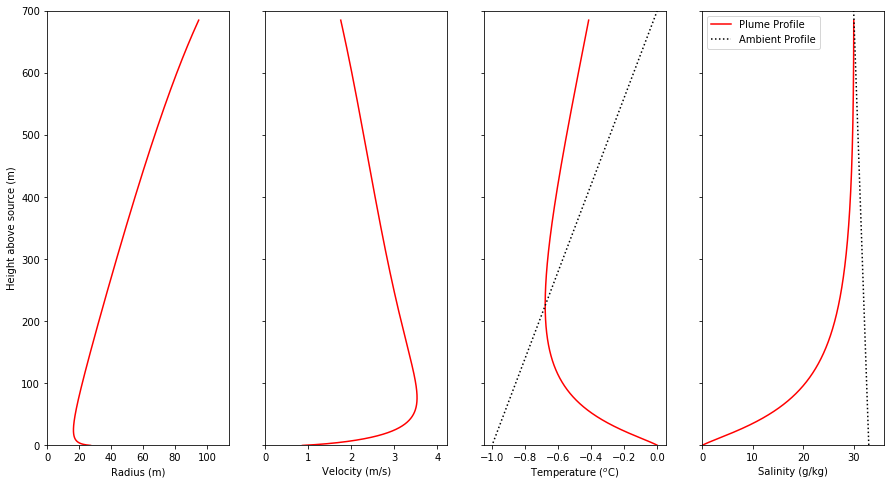

In [21]:
f,ax = plt.subplots(1,4, sharey=True, figsize=(15,8))

# radius
ax[0].plot(plume['b_p'], plume['z'], 'r-')
ax[0].set_xlim(0, np.nanmax(plume['b_p'])*1.2)
ax[0].set_ylim(0, h_w)

ax[0].set_xlabel('Radius (m)')
ax[0].set_ylabel('Height above source (m)')

# velocity
ax[1].plot(plume['w_p'], plume['z'], 'r-')
ax[1].set_xlim(0, np.nanmax(plume['w_p'])*1.2)
ax[1].set_xlabel('Velocity (m/s)')

# temperature
ax[2].plot(plume['t_p'], plume['z'], 'r-')
ax[2].plot(ambient.temperature, ambient.z, 'k:')
#ax[2].set_xlim(0, np.nanmax(plume['t_p'])*1.2)
ax[2].set_xlabel('Temperature ($^o$C)')

# salinity
ax[3].plot(plume['s_p'], plume['z'], 'r-', label='Plume Profile')
ax[3].plot(ambient.salinity, ambient.z, 'k:', label= 'Ambient Profile')
ax[3].set_xlim(0, np.nanmax(plume['s_p'])*1.2)
ax[3].set_xlabel('Salinity (g/kg)')

# Add in the neutral buoyancy height
nb_height = max(plume['z'])#[~np.isnan(plume['b_p'])])
#for axis in ax:
#    axis.plot([0, 150], [nb_height, nb_height], '--', label = 'Neutral Buoyancy')
    
ax[3].legend()